In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [7]:
print(train.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [8]:
full = pd.concat([train,test],axis = 0)

In [9]:
full

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [10]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [11]:
full.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
full.drop(['User_ID'],axis=1,inplace=True)

In [13]:
full.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
full["Gender"] = full['Gender'].replace("F",1)
full["Gender"] = full['Gender'].replace("M",0)

In [15]:
full['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
full['Age'] = full['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [18]:
full.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0


In [19]:
full_city = pd.get_dummies(full['City_Category'],drop_first = True)

In [20]:
full = pd.concat([full,full_city],axis=1)

In [21]:
full.drop(['City_Category'],axis = 1,inplace=True)

In [22]:
full

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,7,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,1,3,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,1,3,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,1,3,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,1,5,1,4+,0,10,16.0,NaN,NaN,0,1


In [23]:
full.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [24]:
full['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [25]:
full['Product_Category_2'] = full['Product_Category_2'].fillna(-2.0).astype('float32')
full['Product_Category_3'] = full['Product_Category_3'].fillna(-2.0).astype('float32')

In [26]:
full.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [27]:
full.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,-2.0,-2.0,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,-2.0,-2.0,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,-2.0,1057.0,0,0
4,P00285442,0,7,16,4+,0,8,-2.0,-2.0,7969.0,0,1


In [28]:
full.shape

(783667, 12)

In [29]:
full['Stay_In_Current_City_Years'] = full['Stay_In_Current_City_Years'].replace("4+",4)

In [30]:
full.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,-2.0,-2.0,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,-2.0,-2.0,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,-2.0,1057.0,0,0
4,P00285442,0,7,16,4,0,8,-2.0,-2.0,7969.0,0,1


In [31]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float32
 8   Product_Category_3          783667 non-null  float32
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float32(2), float64(1), int64(5), object(2), uint8(2)
memory usage: 6

In [32]:
full['Stay_In_Current_City_Years'] = full['Stay_In_Current_City_Years'].astype(int)

In [33]:
full['B'] = full['B'].astype(int)
full['C'] = full['C'].astype(int)

In [34]:
full

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,-2.0,-2.0,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,-2.0,-2.0,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,-2.0,1057.0,0,0
4,P00285442,0,7,16,4,0,8,-2.0,-2.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,1,3,15,4,1,8,-2.0,-2.0,NaN,1,0
233595,P00254642,1,3,15,4,1,5,8.0,-2.0,NaN,1,0
233596,P00031842,1,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,1,5,1,4,0,10,16.0,-2.0,NaN,0,1


C:\Users\VICKY R R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

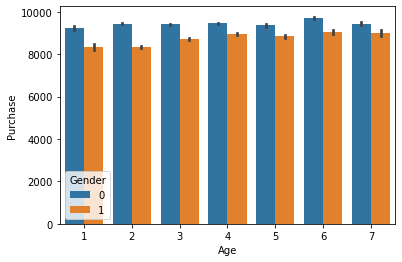

In [35]:
#Age vs purchase
sns.barplot('Age','Purchase',hue='Gender',data=full)

C:\Users\VICKY R R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

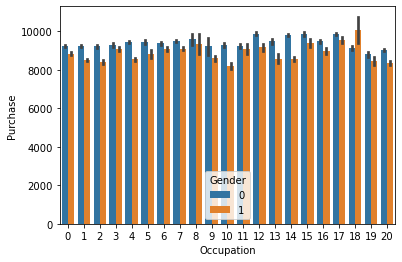

In [36]:
##Occupation vs purchase
sns.barplot('Occupation','Purchase',hue='Gender',data=full)

C:\Users\VICKY R R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

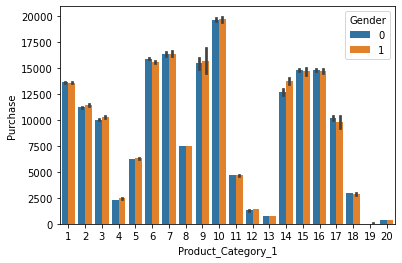

In [37]:
#Product_Category_1 vs purchase
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=full)

C:\Users\VICKY R R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

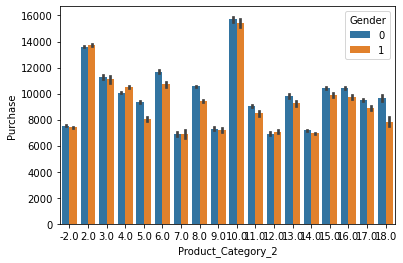

In [38]:
#Product_Category_2 vs purchase
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=full)

C:\Users\VICKY R R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

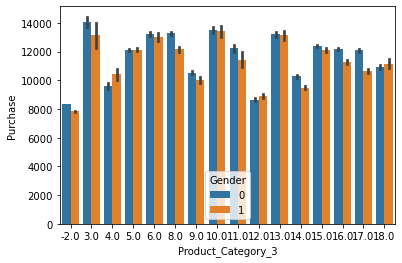

In [39]:
#Product_Category_3 vs purchase
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=full)

In [40]:
full[full['Purchase'].isnull()]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,0,5,7,2,1,1,11.0,-2.0,NaN,1,0
1,P00113442,0,3,17,0,0,3,5.0,-2.0,NaN,0,1
2,P00288442,1,4,1,4,1,5,14.0,-2.0,NaN,1,0
3,P00145342,1,4,1,4,1,4,9.0,-2.0,NaN,1,0
4,P00053842,1,3,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,1,3,15,4,1,8,-2.0,-2.0,NaN,1,0
233595,P00254642,1,3,15,4,1,5,8.0,-2.0,NaN,1,0
233596,P00031842,1,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,1,5,1,4,0,10,16.0,-2.0,NaN,0,1


In [41]:
full_train = full[~full['Purchase'].isnull()]
full_test = full[full['Purchase'].isnull()]

In [42]:
full_train.drop(['Product_ID'],axis=1,inplace=True)

C:\Users\VICKY R R\AppData\Local\Temp\ipykernel_30912\3595163051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_train.drop(['Product_ID'],axis=1,inplace=True)


In [43]:
full_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,1,10,2,0,3,-2.0,-2.0,8370.0,0,0
1,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1,1,10,2,0,12,-2.0,-2.0,1422.0,0,0
3,1,1,10,2,0,12,14.0,-2.0,1057.0,0,0
4,0,7,16,4,0,8,-2.0,-2.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,0,6,13,1,1,20,-2.0,-2.0,368.0,1,0
550064,1,3,1,3,0,20,-2.0,-2.0,371.0,0,1
550065,1,3,15,4,1,20,-2.0,-2.0,137.0,1,0
550066,1,7,1,2,0,20,-2.0,-2.0,365.0,0,1


In [44]:
x = full_train.drop(['Purchase'],axis=1)

In [45]:
y = full_train['Purchase']

In [46]:
x

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1,1,10,2,0,3,-2.0,-2.0,0,0
1,1,1,10,2,0,1,6.0,14.0,0,0
2,1,1,10,2,0,12,-2.0,-2.0,0,0
3,1,1,10,2,0,12,14.0,-2.0,0,0
4,0,7,16,4,0,8,-2.0,-2.0,0,1
...,...,...,...,...,...,...,...,...,...,...
550063,0,6,13,1,1,20,-2.0,-2.0,1,0
550064,1,3,1,3,0,20,-2.0,-2.0,0,1
550065,1,3,15,4,1,20,-2.0,-2.0,1,0
550066,1,7,1,2,0,20,-2.0,-2.0,0,1


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, x, y):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

Results
MSE: 4614.807498877468
CV Score: 4624.579274327459


<AxesSubplot:title={'center':'Model Coefficients'}>

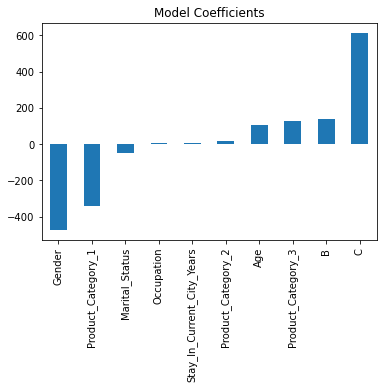

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 3063.102415663181
CV Score: 3051.965512729302


<AxesSubplot:title={'center':'Feature Importance'}>

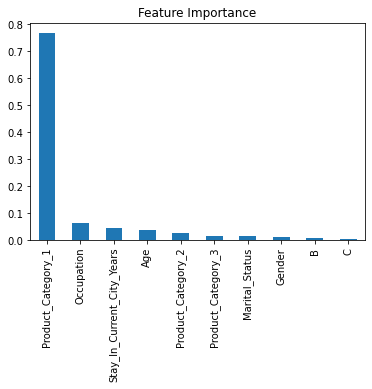

In [60]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model, x, y)
features = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3355.651795329761
CV Score: 3339.0491746380385


<AxesSubplot:title={'center':'Feature Importance'}>

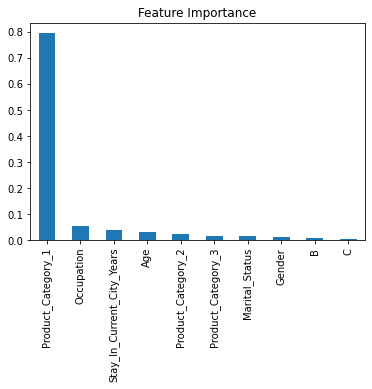

In [57]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x, y)
features = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3193.398938092355
CV Score: 3182.2312229654913


<AxesSubplot:title={'center':'Feature Importance'}>

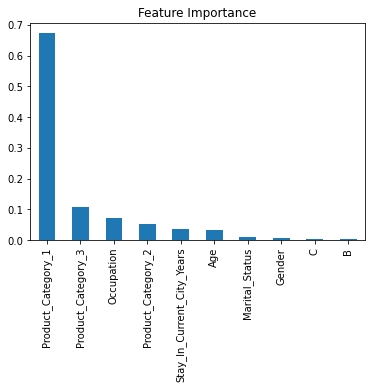

In [61]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1)
train(model, x, y)
features = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')